# CMSE 201 Semester Project

#### CMSE 201 Final Project
### &#9989; Kaitlyn Watson
### &#9989; Section_004
#### &#9989; 4/10/2022

# ___Analysis of Factors that Affected Avocado Prices from 2015-2020___

## Background and Motivation

As the world is ever-changing, it is clear that the American diet is as well. More and more people are transitioning to a healthier lifestyle and incorporating more whole foods into their diet. Furthermore, there has also been a rise of eating locally grown and organic foods versus the standard option due to both chemical and ethical reasons. For this study, I have chose to focus on Avocados, a whole food that has the option of being organic or conventional and has recently spiked in popularity. Avocados are nutrient dense, high in healthy fats, and keep you satisfied for a long period of time. They are packed with micronutrients and help absorb many vitamins and minerals into the body. Because of these health benefits, people have been more inclined to add avocado to their salads, smoothies, bowls, and the most popular trend of avocado toast. The uses and benefits are endless. 

With new 'healthy lifestyle' trends arising and various ways of incorportating this fruit into everyday meals/snacks; more people, restaurants, and companies have been purchasing this produce. As a fellow avocado enthusiast, I have chosen to analyze avocados and their average prices over a set of years. I desire to understand how healthy living effected commodities such as avocados. My research questions I intend to answer are:

__In the United States, how does the type of avocado and the region in which it is located impact the average price at which it is sold from the years 2015-2020? Has the recent popularity of avocados cause a shift in the amount of organic and conventional avocados sold? And if so, how does this shift compare with their average price at which they are sold?__

## Methodology

I will using a dataset from the Board of Hass Avocados called: avocado-updated-2020.csv. This dataset provides information on various regions, average prices, year, and type of avocado. I will use several different types of visualizations, beginning with a breakdown of several different regions and their prices for avocados based on type. I will then further my exploration into each year and finish with analysis of the percentage ofavocados bought based on type (conventional vs. organic). 

In [22]:
#importing modules 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [23]:

#import the dataset
Avocados=pd.read_csv("avocado-updated-2020.csv")

#Clean up dataset to only include information needed
Avocados2=Avocados.drop(columns=["date", '4046', '4225', '4770', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags'])
Avocados_with_index = Avocados2.set_index("geography")   #set index as region

#Remove any regions I would not like to include
Avocados_by_region=Avocados_with_index.drop(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Nashville', 'New Orleans/Mobile', 'New York',
       'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh','Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.','West Tex/New Mexico'])
Avocados_Region=Avocados_by_region.reset_index()    #reset the index
Avocados_Region.head()


,geography,average_price,total_volume,type,year
0,Great Lakes,1.02,3382800.12,conventional,2015
1,Great Lakes,1.54,61615.10,organic,2015
2,Midsouth,1.10,2578275.12,conventional,2015
3,Midsouth,1.56,58065.35,organic,2015
4,Northeast,1.09,3759282.62,conventional,2015


In [24]:
#provide preliminary statistics based on data from above
Avocados_Region.describe()

,average_price,total_volume,year
count,4896.000000,4.896000e+03,4896.000000
mean,1.347355,2.095347e+06,2017.460784
std,0.320527,2.530847e+06,1.699875
min,0.620000,4.574170e+03,2015.000000
25%,1.100000,1.176913e+05,2016.000000
50%,1.340000,3.663051e+05,2017.000000
75%,1.580000,3.900680e+06,2019.000000
max,2.520000,1.127475e+07,2020.000000


Here are some preliminary statistics for this dataset. I have chosen to include all years from 2015-2020 and provided 8 different regions: Great Lakes, Midsouth, Northeast, Northern New England, Plains, South Central, Southeast, and West. Using the table above, we initially see that over the course of 5 years, the average price for an avocado is 1.34 dollars. It is important to take note this excludes the factor of whether or not it is a conventional or organic avocado. The maximum price for an avocado was sold at 2.52 dollars and the minimum price was only 0.62 dollars. This range is quite large with about a 1.90 dollar difference. 

__Breakdown of Conventional Vs. Organic Avocados__

In [67]:
#Creating New Dataframe for Organic Avocados Via Masking
Organic_Mask=Avocados_Region['type']=='organic'
Organic_Avo=Avocados_Region[Organic_Mask]

Organic_Avo.describe()

,average_price,total_volume,year
count,2448.000000,2448.000000,2448.000000
mean,1.568725,137796.088023,2017.460784
std,0.244769,101065.295575,1.700049
min,0.830000,4574.170000,2015.000000
25%,1.400000,57605.685000,2016.000000
50%,1.560000,117666.690000,2017.000000
75%,1.730000,202089.520000,2019.000000
max,2.520000,793464.770000,2020.000000


In [68]:
#Creating New Dataframe for Conventional Avocados Via Masking
Conventional_Mask=Avocados_Region['type']=='conventional'
Conventional_Avo=Avocados_Region[Conventional_Mask]

Conventional_Avo.describe()

,average_price,total_volume,year
count,2448.000000,2.448000e+03,2448.000000
mean,1.125984,4.052899e+06,2017.460784
std,0.218073,2.266193e+06,1.700049
min,0.620000,2.196899e+05,2015.000000
25%,0.977500,2.425282e+06,2016.000000
50%,1.110000,3.900805e+06,2017.000000
75%,1.260000,5.681245e+06,2019.000000
max,1.980000,1.127475e+07,2020.000000


After viewing our intial statistics, it is found that the average price for an organic avocado is 1.56 dollars while the average price for a conventional avocado is 1.25 dollars. These values will support the visualizations in the results section where we are looking at the breakdown of prices via region and years.

In [69]:
#finding the total number of avocados produced for selected years dependent on type

#2015
Avo_2015=[]

#create a dataframe for 2015 

Data_2015_Org=Organic_Avo['year']==2015          #organic
Org_Avo_2015=Organic_Avo[Data_2015_Org]

Data_2015_Conv=Conventional_Avo['year']==2015    #conventional
Conv_Avo_2015=Conventional_Avo[Data_2015_Conv]

#2016
Avo_2016=[]

#create a dataframe for 2015 

Data_2016_Org=Organic_Avo['year']==2016          #organic
Org_Avo_2016=Organic_Avo[Data_2016_Org]

Data_2016_Conv=Conventional_Avo['year']==2016    #conventional
Conv_Avo_2016=Conventional_Avo[Data_2016_Conv]


#2017
Avo_2017=[]

Data_2017_Org=Organic_Avo['year']==2017
Org_Avo_2017=Organic_Avo[Data_2017_Org]

Data_2017_Conv=Conventional_Avo['year']==2017    #conventional
Conv_Avo_2017=Conventional_Avo[Data_2017_Conv]
#2018
Avo_2018=[]

#create a dataframe for 2018 

Data_2018_Org=Organic_Avo['year']==2018          #organic
Org_Avo_2018=Organic_Avo[Data_2018_Org]

Data_2018_Conv=Conventional_Avo['year']==2018    #conventional
Conv_Avo_2018=Conventional_Avo[Data_2018_Conv]


#2015
Avo_2019=[]

#create a dataframe for 2015 

Data_2019_Org=Organic_Avo['year']==2019          #organic
Org_Avo_2019=Organic_Avo[Data_2019_Org]

Data_2019_Conv=Conventional_Avo['year']==2015    #conventional
Conv_Avo_2019=Conventional_Avo[Data_2019_Conv]


#2020
Avo_2020=[]

Data_2020_Org=Organic_Avo['year']==2020
Org_Avo_2020=Organic_Avo[Data_2020_Org]

Data_2020_Conv=Conventional_Avo['year']==2020
Conv_Avo_2020=Conventional_Avo[Data_2020_Conv]



#Append to Empty Lists
Avo_2015.append(Org_Avo_2015['total_volume'].sum())
Avo_2015.append(Conv_Avo_2015['total_volume'].sum())
Avo_2016.append(Org_Avo_2016['total_volume'].sum())
Avo_2016.append(Conv_Avo_2016['total_volume'].sum())
Avo_2017.append(Org_Avo_2017['total_volume'].sum())
Avo_2017.append(Conv_Avo_2017['total_volume'].sum())
Avo_2018.append(Org_Avo_2018['total_volume'].sum())
Avo_2018.append(Conv_Avo_2018['total_volume'].sum())
Avo_2019.append(Org_Avo_2019['total_volume'].sum())
Avo_2019.append(Conv_Avo_2019['total_volume'].sum())
Avo_2020.append(Org_Avo_2020['total_volume'].sum())
Avo_2020.append(Conv_Avo_2020['total_volume'].sum())

#create a list of the total number of avocados produced dependent on type
total=[]
total.append(Organic_Avo['total_volume'].sum())
total.append(Conventional_Avo['total_volume'].sum())

## Results

__Visualizing Price Breakdown Via Region and Type__

<Figure size 288x288 with 0 Axes>

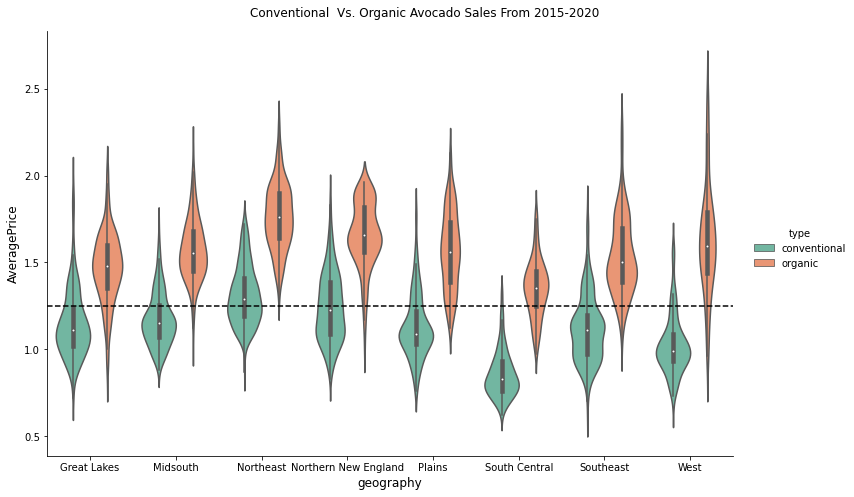

In [72]:
#plot the Average Price for each region selected from 2015 to 2018 and specify the type of avocado
plt.figure(figsize=(4,4))

 
g = sns.catplot(x="geography", y="average_price",
                hue="type", 
                data=Avocados_Region, kind="violin",palette="Set2",
                height=7, aspect=1.5,);
g.fig.suptitle('Conventional  Vs. Organic Avocado Sales From 2015-2020', fontsize=12)
g.set_xlabels(visible=True, fontsize=12)
g.set_ylabels('AveragePrice',fontsize=12)
g.refline(y=1.25, color='black')
plt.show()



This first visualization shows the distribution of conventional versus organic avocados for each region and depending on price. Right away, it is interesting to note that the West has the largest range in prices for  organic Avocado. Furthermore, it is apparent that majority of the distribution for all region's organic avocados are above the orginal mean indicated by the black dotted line. Northern New England appears to have the most even distribution in line with the overall mean.

__Visualizing Breakdown of Price by Year__

<Figure size 360x360 with 0 Axes>

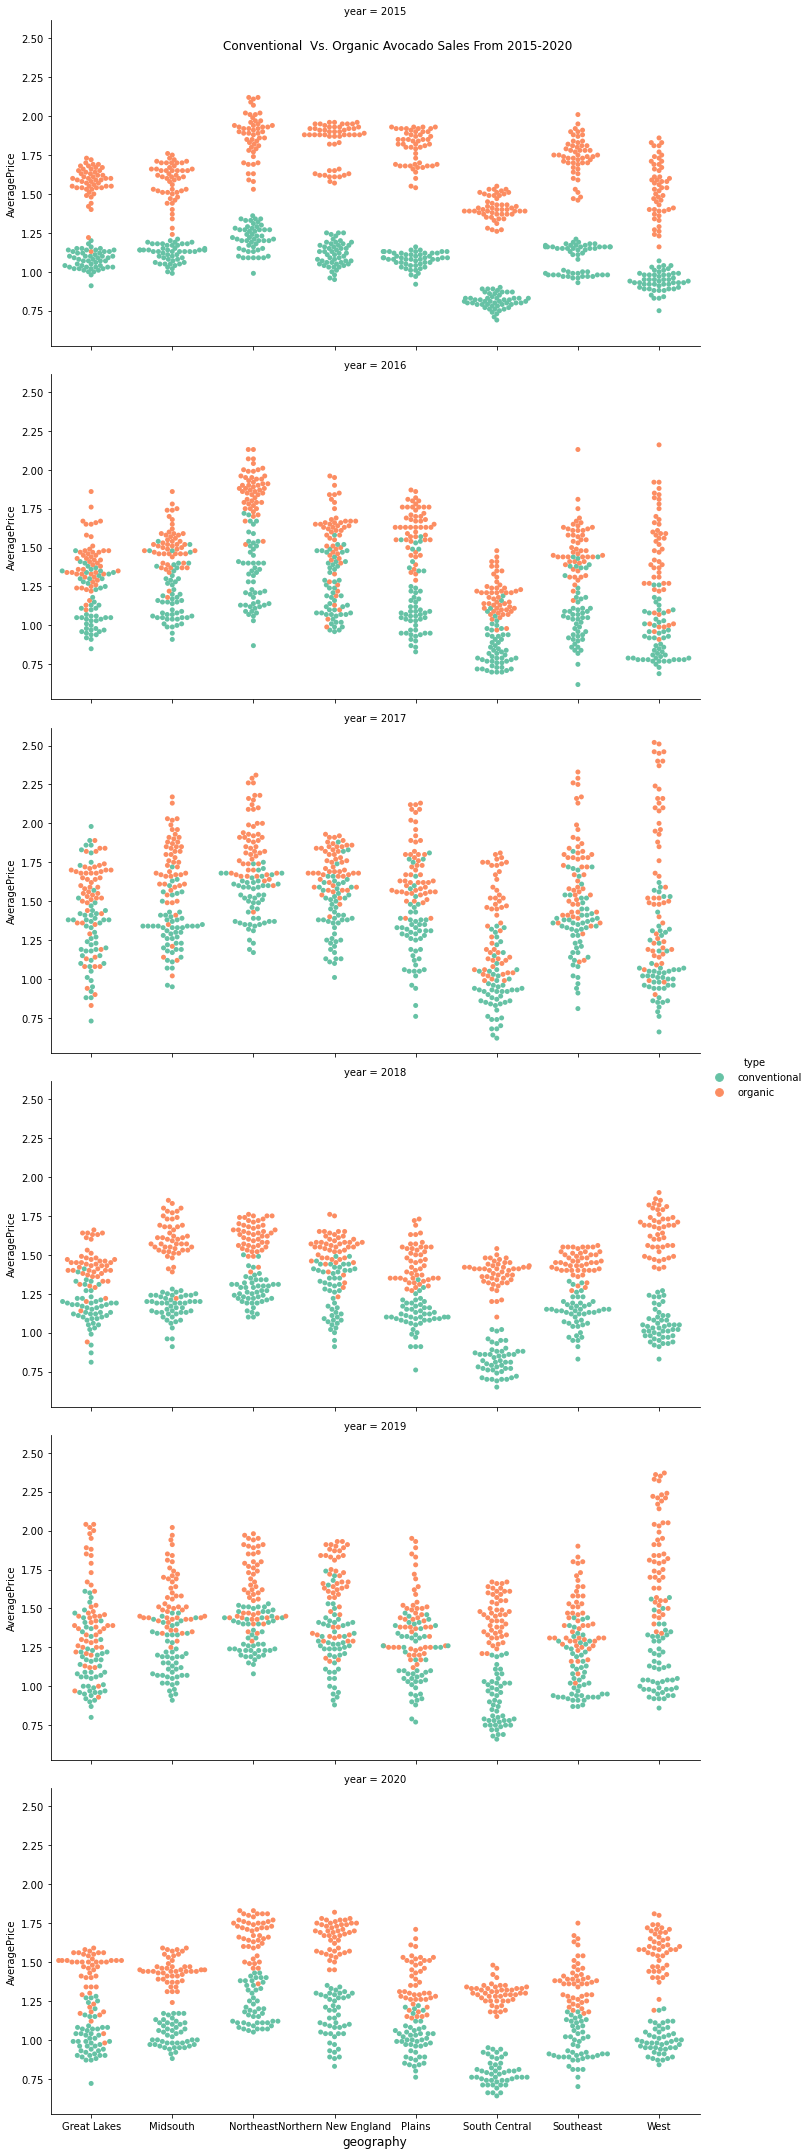

In [26]:
#breaking down plot above by year

plt.figure(figsize=(5,5))

#Create a swarm plot using catplot function
g = sns.catplot(x="geography", y="average_price",
                hue="type", row='year',
                data=Avocados_Region, palette="Set2" ,kind="swarm",
                height=5, aspect=2,);
g.fig.suptitle('Conventional  Vs. Organic Avocado Sales From 2015-2020')
g.set_xlabels(visible=True, fontsize=12)
g.set_ylabels('AveragePrice')
plt.show()



The swarm plots above provide more in depth information on the avocado prices and how they fluctuate each year. Focusing on the West region once again, it is apparent that the year 2017 and 2019 provides the largest range snd highest prices for organic avocados. 2017 is where we see the maximum price of 2.52 dollars. It is also interesting to note that 2015 had the largest gap in prices between conventional and organic avocados for all regions. 

For the years after, regions tend to have a mix of organic and conventional avocados at the same price (between 1.0 dollars and 1.5 dollars), with the most blended including the Great Lakes and Northern New England. The lowest prices for avocados was consistenly found in South Central for all years and types of avocados. This visualization provides an abundance of information and detail on this avocado trend.


The results are quite interesting due to the fact that the state of Claifornia (located in the West) is the main grower of both conventional and organic avocados. Initially, it makes sense that they would have some of the lowest prices for conventional avocados, but it is quite perplexing that there prices for organic are so high. Compared to places such as South Central which is required to have their avocados shipped, there must be some other reason for this organic price to be so high.


__Conventional Vs. Organic Avocados Based on Total Volume Sold__

To begin this section analysis, the data will be separated for organic and conventional avocados. It is important to state that this data will NOT be region dependent.

Text(0.5, 1.0, 'Total Number of Conventional Vs. Organic Avocados')

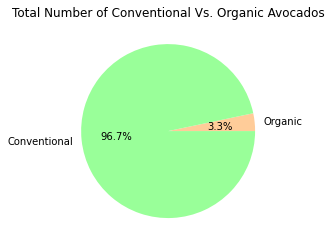

In [33]:

#create pie charts to visualize results

plt.pie(total, labels=mylabels, colors=colors, autopct='%.1f%%')
plt.title('Total Number of Conventional Vs. Organic Avocados')


Here we see that the majority of avocados sold are convnetional. This is no surprise and directly correlates to the high prices of organic avocados shown in the plots above.

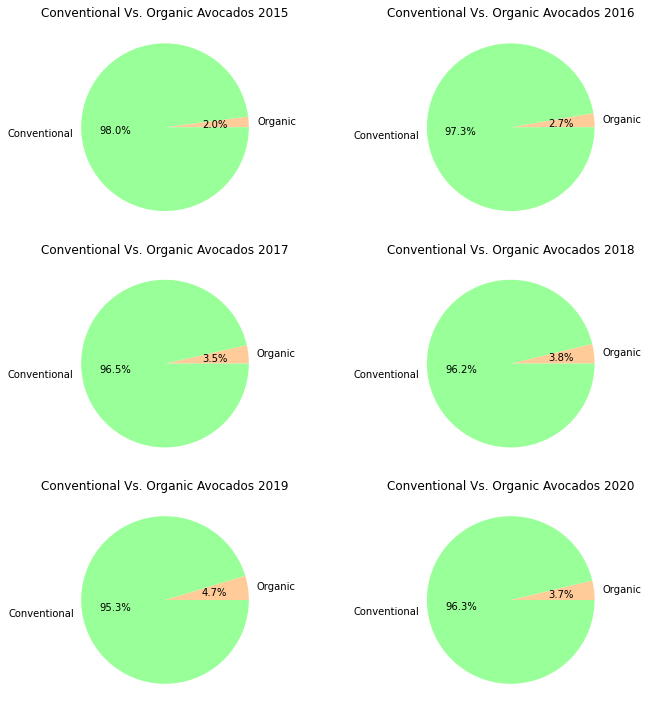

In [73]:
#create pie charts broken down by each year

mylabels=['Organic', 'Conventional']
colors = ['#ffcc99', '#99ff99']

fig, axs = plt.subplots(3, 2, figsize=(10,10))
axs[0,1].pie(Avo_2016, labels=mylabels, colors=colors, autopct='%.1f%%')
axs[0,1].set_title('Conventional Vs. Organic Avocados 2016')

axs[0,0].pie(Avo_2015,labels =mylabels,colors = colors,autopct = '%1.1f%%')
axs[0,0].set_title('Conventional Vs. Organic Avocados 2015')

axs[1,1].pie(Avo_2018, labels=mylabels, colors=colors, autopct='%.1f%%')
axs[1,1].set_title('Conventional Vs. Organic Avocados 2018')

axs[1,0].pie(Avo_2017,labels=mylabels, colors = colors,autopct = '%1.1f%%')
axs[1,0].set_title('Conventional Vs. Organic Avocados 2017')

axs[2,0].pie(Avo_2019, labels=mylabels, colors=colors, autopct='%.1f%%')
axs[2,0].set_title('Conventional Vs. Organic Avocados 2019')

axs[2,1].pie(Avo_2020,labels =mylabels, colors = colors ,autopct = '%1.1f%%')
axs[2,1].set_title('Conventional Vs. Organic Avocados 2020')

fig.tight_layout()


Overall we see a increasing trend of organic avocados being sold from 2015-2019. However there is a 0.9 percent spike from 2018 to 2019, but then drops back down by 1 percent in 2020. We can now compare these results to the average prices for each year.

Text(0.5, 1.0, 'Conventional Vs. Avocado Mean prices over the Years')

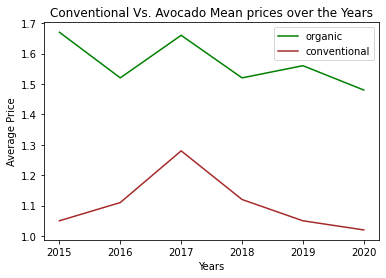

In [35]:
#visualizing the average prices of avocados vs. the year based on type

Organic_Prices=[round(Org_Avo_2015['average_price'].mean(),2),round(Org_Avo_2016['average_price'].mean(),2),round(Org_Avo_2017['average_price'].mean(),2), round(Org_Avo_2018['average_price'].mean(),2),round(Org_Avo_2019['average_price'].mean(),2),round(Org_Avo_2020['average_price'].mean(),2)]
Conventional_Prices=[round(Conv_Avo_2015['average_price'].mean(),2),round(Conv_Avo_2016['average_price'].mean(),2),round(Conv_Avo_2017['average_price'].mean(),2), round(Conv_Avo_2018['average_price'].mean(),2),round(Conv_Avo_2019['average_price'].mean(),2),round(Conv_Avo_2020['average_price'].mean(),2)]
Years=[2015,2016, 2017, 2018, 2019, 2020]
plt.plot(Years, Organic_Prices, color='green')
plt.plot(Years, Conventional_Prices, color='brown')
plt.legend(['organic','conventional'])
plt.xlabel('Years')
plt.ylabel('Average Price')
plt.title('Conventional Vs. Avocado Mean prices over the Years')


Analyzing the various plots above, there are fluctuations in price from 2015 to 2017 before seeing an decreasing trend from 2017 and on. Both types of avocados have a large spike in 2017. It is important to point out that in 2019, although prices rose for organic avocados and decreased for conventional, people increased their purchase of organic avocados for that year (shown in the pie charts above). However, for the year 2020, both organic and conventional avocado prices began to decrease, with conventional avocados close to one dollar. This is reflected in the drop by one percent in 2020 for the total volume of organic avocados sold. This is quite interesting result as people's buying habits change based on the amount that the price varied and how close conventional avocados were priced at a one dollar. (see discussion for further analysis).

## Discussion and Conclusion

Referencing back to my research questions, it is clear that the region and type of avocado in which it is located impacts the price at which it is sold. The farther west the region is located, the higher the prices are for these avocados. Even more evident, organic avocados were consistently higher in price then conventional avocados in every region over all 5 years. Using the data visualization techniques above, it is also apparent that there was a consistent increase in organic avocados purchased from 2015-2019. There was about a .3 to .9 percent increase during those years and then a decrease by 0.1 percent in 2020. Comparing this with the plot representing the average price versus year for each type: when people see that the conventional avocado is closer to the one dollar mark, they are more apt to purchase that avocado verseus the organic when it is around 1.5. This could be especially due to the fact that COVID-19 occurred and people became much more frugal with their money. However, back in 2019 and before, if the conventional avocado is priced higher than a dollar (even just 10 cents more) people would potentially choose the organic. However, this is still a small percentage due to the fact the about 96.7 of people will buy conventional no matter the price (as seen in the very first pie chart). Overall, all of my research questions were answered in detail using the plots and data visualization techniqes above. 


Through this research of avocado sales, I have learned how to draw conclusions and analyze results from real-world data. I have developed my skills in data visualizations and cleaning up large data sets to make them easy to read and user friendly. More specifically, I have learned about how regions and specific types of avocados impact average prices and volumes at which they are sold. I have also discovered interesting results and developed skills to interpret what my visualizations have produced. 

There were several obstacles that I ran into during this project. The first would be making sure my results were interesting. It was important that I were to grab my audience's attention and show them why this research is important and useful. Furthermore, I struggled simply trying to create plots that made sense and ran without any erros. There were several times in which I had to use the internet to help me create plots that were meaningful and providied the necessary components (i.e. colors, labels, mulitple plots, etc)My overall goal for my plots were to appear clear and concise. Finally, ensuring that my information and conclusions were accurate was another obstacle. I needed to make sure that I was not omitting information such as outliers from my data, along with making sure my code provided the correct numbers when trying to compute statistics such as the mean or sum of various columns. This project has truly developed my skills in computational modeling.

Going forward, I would like use more datasets for this project. More specifically, I would have found a dataset on the current 'health trends' that have occurred and I would like to use that to see if I could find a correlation between the rise in 'healthy living' and 'avocado sales.' Finally, I think it would have been interesting to predict how prices would change in the future. If I had a stronger skill set, I think this could have been another great way to model the data. Although I could have implemented these changes or done this project differently, I am very satisfied with the results.

### References

[1] Amipara, Kevin. “Better Visualization of PIE Charts by Matplotlib.” Medium, Medium, 20 Nov. 2019, https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f. 

[2] “Plot a Pie Chart in Python Using Matplotlib.” GeeksforGeeks, 30 Nov. 2021, https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/. 

[3] “Round a Number to the Nearest Hundredth Python Code Example.” Round a Number to the Nearest Hundredth Python 
     Code Example, https://www.codegrepper.com/codeexamples/python/round+a+number+to+the+nearest+hundredth+python.
     
[4] Kornev, Timofei, et al. “Avocados Prices (2020).” Kaggle, https://Www.kaggle.com/Datasets/Timmate/Avocado-Prices-2020, 6 Feb. 2021. Dataset name: "avocados-updated-2020.csv"

[5] Waskom, Michael. “Example Gallery¶.” Example Gallery - Seaborn 0.11.2 Documentation, 
    https://seaborn.pydata.org/examples/index.html. 

